In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [17]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

In [18]:
imagePaths = []
for dirname, _, filenames in os.walk('Resultado GAN'):
    for filename in filenames:
        imagePaths.append(os.path.join(dirname, filename))

In [19]:
 len(imagePaths)

1776

In [20]:
 imagePaths[0]

'Resultado GAN\\healthy\\Generated\\1.tiff'

In [21]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #rescale=1./255, #disable normalising, so we can display the images later
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [22]:
#Taking the images from the folder and resizing to 128x128 RGB
#labeling them from ['healthy', 'mild', 'moderate', 'severe'] to -> [0,1,2,3]
new_img_height = 128
new_img_width = 128
channels = 3
all_labels = ['healthy', 'mild', 'moderate', 'severe']
original_data_x = []
original_data_y = []
for imagePath in tqdm(imagePaths):
    if imagePath.split(os.path.sep)[-2] != 'Generated':
        continue
    label = all_labels.index(imagePath.split(os.path.sep)[-3]) #taking the label from the path
#     image = cv2.imread(imagePath) #reading image from path
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #turning image into rgb
#     image = cv2.resize(image, (new_img_height, new_img_width)) #resizing image
#     image = image/255.0 #normalizing
    img = load_img(imagePath)  # this is a PIL image
    #img = cv2.resize(img, (new_img_height, new_img_width)) #resizing image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        if i > 10:
            break  # otherwise the generator would loop indefinitely
        i += 1
        original_data_x.append(np.resize(batch, (new_img_width,new_img_height,3)))
        original_data_y.append(label)
        #print(f"i = {i}, batch = {batch}\n")

100%|██████████████████████████████████████████████████████████████████████████████| 1776/1776 [01:12<00:00, 24.53it/s]


In [23]:
imagePaths = []

In [24]:
import sys

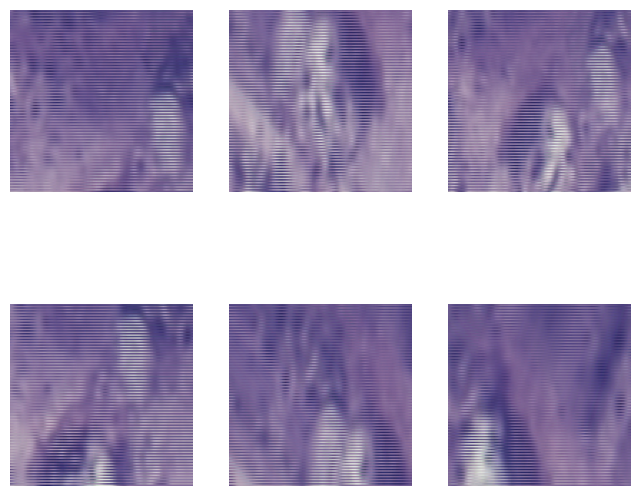

In [25]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = original_data_x[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image/255)
    plt.axis("off")

In [26]:
import random
def shuffle_dataset(data_x, data_y):
    new_data = []
    for i in range(len(data_x)):
        new_data.append((data_x[i], data_y[i]))
    random.shuffle(new_data)
    new_data_x = []
    new_data_y = []
    for i in range(len(new_data)):
        new_data_x.append(new_data[i][0])
        new_data_y.append(new_data[i][1])
    return new_data_x, new_data_y

In [27]:
original_data_x, original_data_y = shuffle_dataset(original_data_x, original_data_y)

In [28]:
original_data_x[0].shape

(128, 128, 3)

In [29]:
print(f"Total Images = {len(original_data_y)}")

Total Images = 6512


In [30]:
np.save('data_x_original_augmented.npy', original_data_x)
np.save('data_y_original_augmented.npy', original_data_y)